## Score Prediction

***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import sklearn

import shap
import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta

import scipy.stats

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score



import warnings
warnings.filterwarnings('ignore')

from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("stuff.csv")

In [3]:
df

,Content ID,Type,Category,Reaction,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,negative,10
...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,positive,45
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,negative,12
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,negative,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24573 non-null  object
 1   Type        24573 non-null  object
 2   Category    24573 non-null  object
 3   Reaction    24573 non-null  object
 4   Sentiment   24573 non-null  object
 5   Score       24573 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [5]:
df.describe(include='all')

,Content ID,Type,Category,Reaction,Sentiment,Score
count,24573,24573,24573,24573,24573,24573.00
unique,962,4,40,16,3,NaN
top,496645a7-64f7-4c56-94f5-a71671cb262e,photo,animals,heart,positive,NaN
freq,48,6589,1765,1622,13807,NaN
mean,NaN,NaN,NaN,NaN,NaN,39.62
std,NaN,NaN,NaN,NaN,NaN,26.04
min,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,15.00
50%,NaN,NaN,NaN,NaN,NaN,35.00
75%,NaN,NaN,NaN,NaN,NaN,65.00


In [6]:
df.shape

(24573, 6)

In [7]:
df.columns

Index(['Content ID', 'Type', 'Category', 'Reaction', 'Sentiment', 'Score'], dtype='object')

## Data Preprocessing

### Treat Missing Values

In [8]:
df.isnull().sum()

Content ID    0
Type          0
Category      0
Reaction      0
Sentiment     0
Score         0
dtype: int64

### Replacing values

In [9]:
df.Category.value_counts()

animals              1765
healthy eating       1711
technology           1667
science              1662
cooking              1640
travel               1618
food                 1606
culture              1586
education            1397
soccer               1334
tennis               1328
studying             1303
dogs                 1283
fitness              1257
veganism             1200
public speaking      1157
Fitness               138
Science               116
Animals                92
Food                   91
Soccer                 65
"soccer"               58
"dogs"                 55
"culture"              49
Studying               45
Culture                41
"animals"              40
"veganism"             37
Education              36
Public Speaking        32
Travel                 29
"public speaking"      28
"technology"           28
"cooking"              24
"science"              18
"studying"             15
Veganism               11
Healthy Eating          6
Technology  

In [10]:
df.replace(to_replace='Fitness', value='fitness', inplace=True)

In [11]:
df.replace(to_replace='Veganism', value='veganism', inplace=True)

In [12]:
df.replace(to_replace='Travel', value='travel', inplace=True)

In [13]:
df.replace(to_replace='Technology', value='technology', inplace=True)

In [14]:
df.replace(to_replace='Animals', value='animals', inplace=True)

In [15]:
df.replace(to_replace='Fitness', value='fitness', inplace=True)

In [16]:
df.replace(to_replace='Soccer', value='soccer', inplace=True)

In [17]:
df.replace(to_replace='Culture', value='culture', inplace=True)

In [18]:
df.replace(to_replace='Food', value='food', inplace=True)

In [19]:
df.replace(to_replace='Science', value='science', inplace=True)

In [20]:
df.replace(to_replace='Public Speaking', value='public speaking', inplace=True)

In [21]:
df.replace(to_replace='Healthy Eating', value='healthy eating', inplace=True)

In [22]:
df.replace(to_replace="Education", value='education', inplace=True)

In [23]:
df.replace(to_replace="Studying", value='studying', inplace=True)

In [24]:
df["Category"] = df["Category"].str.replace('"','')

In [25]:
df

,Content ID,Type,Category,Reaction,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,negative,10
...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,positive,45
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,negative,12
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,negative,12


In [26]:
#df.to_csv("cleaned.csv",index=False)

### Create separate tables to look for relationships

In [27]:
df = pd.read_csv("cleaned.csv")

In [28]:
df.columns

Index(['Content ID', 'Type', 'Category', 'Reaction', 'Sentiment', 'Score'], dtype='object')

In [29]:
df2 = pd.pivot_table(data=df, index="Category", columns="Type", aggfunc='sum')

In [30]:
df2

Score                     
Type               GIF  audio  photo  video
Category                                   
animals          12952  22748  27128  12137
cooking          20421  14826  17358  12151
culture          19616  15312  16722  14929
dogs              7942   9378  13626  21565
education         7744  13348  22132  14212
fitness          12923  12370  13029  17001
food             17750  15276  14643  19007
healthy eating   15308  20712  13476  19843
public speaking   5866  10041  12242  21115
science          14049  14966  20607  21546
soccer           20229   8773  12546  16235
studying         17392   7810  19931   9136
technology       19841  23160  16386   9351
tennis           16685  13372   8554  11728
travel           17216   8194  19479  19991
veganism         12283  15841  14979   6516

In [31]:
df2.describe()

Score                           
Type       GIF    audio    photo    video
count    16.00    16.00    16.00    16.00
mean  14888.56 14132.94 16427.38 15403.94
std    4655.41  4853.97  4582.72  4875.81
min    5866.00  7810.00  8554.00  6516.00
25%   12763.00  9875.25 13364.25 12034.75
50%   15996.50 14099.00 15682.50 15582.00
75%   18216.50 15444.25 19592.00 19880.00
max   20421.00 23160.00 27128.00 21565.00

In [32]:
df3 = pd.pivot_table(data=df, index="Category", aggfunc='sum')

In [33]:
df3

,Score
Category,
animals,74965
cooking,64756
culture,66579
dogs,52511
education,57436
fitness,55323
food,66676
healthy eating,69339
public speaking,49264


In [34]:
df3.describe()

,Score
count,16.00
mean,60852.81
std,8459.90
min,49264.00
25%,53829.50
50%,61269.50
75%,67191.50
max,74965.00


In [35]:
df4 = pd.pivot_table(data=df, index="Category", columns="Reaction", aggfunc='sum')

In [36]:
df4

Score                                                                                                                        
Reaction        adore cherish disgust dislike hate heart indifferent interested intrigued  like  love peeking scared super love  want worried
Category                                                                                                                                     
animals          8208    8750       0    1150  640  7200        2000       3300      5220  5050  7735    4515   1980       9225  8540    1452
cooking          7632    5880       0    1150  520  6720        1620       3750      3960  5700  6435    3535   1800       8250  6580    1224
culture          6840    7910       0    1120  470  5820        2220       3300      4545  4850  7020    3465   1755       7500  8540    1224
dogs             5832    5040       0     840  435  5820        1860       2730      3150  4650  4745    3220   1335       6300  5810     744
education        5976    6090       0     910  480  5460        1780       2640      4320  4500  6825    3465   1200       6900  5810    1080
fitness          6912    5110       0     950  355  4980        1640       2430      3690  5550  5720    3010   1440       7500  5040     996
food             6696    8330       0    1060  650  6420        1940       3240      4230  5000  7995    4025   1515       6675  7700    1200
healthy eating   8784    7350       0    1010  605  6840        2160       3030      4815  5300  6695    3640   1500       8700  7770    1140
public speaking  5472    4550       0     820  305  5280        1540       2250      4140  3700  5525    2275   1125       5700  5670     912
science          8496    7210       0    1130  510  6900        2440       3540      4995  5650  7735    3920   1530       6900  8820    1392
soccer           6264    6020       0     810  435  5580        2320       2640      4185  4550  5655    2940   1485       7125  6790     984
studying         6408    6440       0     740  430  6060        1540       2610      3780  4000  5395    3255   1425       6450  4620    1116
technology       9288    7980       0     950  560  6840        1960       3630      3915  4350  6240    4060   1320       8475  7910    1260
tennis           5256    5670       0     920  435  5400        1720       2610      3690  4000  5005    2660   1320       5475  5110    1068
travel           8280    6930       0    1220  475  6300        1940       2700      4680  5550  6110    3465   1575       6825  7630    1200
veganism         5112    5810       0     700  455  5700        1560       2070      3060  3600  4875    3115   1275       5925  5390     972

In [37]:
df4.describe()

Score                                                                                                                                   
Reaction   adore cherish disgust dislike   hate   heart indifferent interested intrigued    like    love peeking  scared super love    want worried
count      16.00   16.00   16.00   16.00  16.00   16.00       16.00      16.00     16.00   16.00   16.00   16.00   16.00      16.00   16.00   16.00
mean     6966.00 6566.88    0.00  967.50 485.00 6082.50     1890.00    2904.38   4148.44 4750.00 6231.88 3410.31 1473.75    7120.31 6733.12 1122.75
std      1329.31 1258.24    0.00  159.73  94.59  677.36      285.47     504.76    611.78  696.66 1039.97  562.03  225.67    1094.92 1407.50  179.49
min      5112.00 4550.00    0.00  700.00 305.00 4980.00     1540.00    2070.00   3060.00 3600.00 4745.00 2275.00 1125.00    5475.00 4620.00  744.00
25%      5940.00 5775.00    0.00  835.00 435.00 5550.00     1635.00    2610.00   3757.50 4262.50 5492.50 3088.75 1320.00    6412.50 5600.00  993.00
50%      6768.00 6265.00    0.00  950.00 472.50 5940.00     1900.00    2715.00   4162.50 4750.00 6175.00 3465.00 1462.50    6900.00 6685.00 1128.00
75%      8226.00 7490.00    0.00 1122.50 530.00 6750.00     2040.00    3300.00   4578.75 5362.50 6873.75 3710.00 1541.25    7687.50 7805.00 1224.00
max      9288.00 8750.00    0.00 1220.00 650.00 7200.00     2440.00    3750.00   5220.00 5700.00 7995.00 4515.00 1980.00    9225.00 8820.00 1452.00

In [38]:
df5 = pd.pivot_table(data=df, index="Category", columns="Sentiment", aggfunc='sum')

In [39]:
df5

Score                 
Sentiment       negative neutral positive
Category                                 
animals             5222    6515    63228
cooking             4694    5155    54907
culture             4569    5685    56325
dogs                3354    5080    44077
education           3670    5245    48521
fitness             3741    4650    46932
food                4425    5965    56286
healthy eating      4255    5800    59284
public speaking     3162    3815    42287
science             4562    6360    60246
soccer              3714    5260    48809
studying            3711    4795    45763
technology          4090    6020    58628
tennis              3743    4380    42216
travel              4470    5405    55005
veganism            3402    4675    41542

In [40]:
df5.describe()

Score                 
Sentiment negative neutral positive
count        16.00   16.00    16.00
mean       4049.00 5300.31 51503.50
std         573.60  737.72  7260.61
min        3162.00 3815.00 41542.00
25%        3700.75 4765.00 45341.50
50%        3916.50 5252.50 51858.00
75%        4493.00 5841.25 56900.75
max        5222.00 6515.00 63228.00

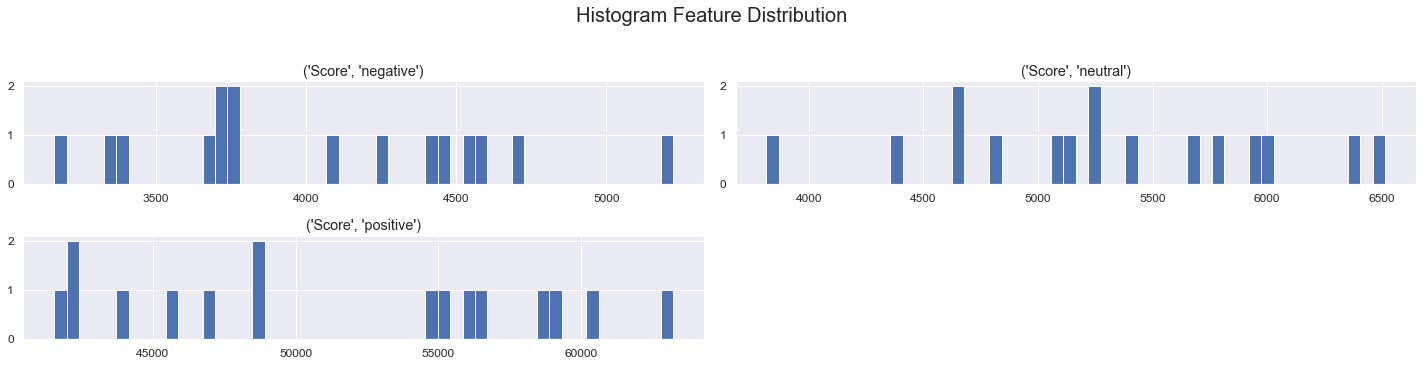

In [41]:
df5.hist(bins=50, figsize=(20,5))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Drop unwanted features

In [42]:
df.columns

Index(['Content ID', 'Type', 'Category', 'Reaction', 'Sentiment', 'Score'], dtype='object')

In [43]:
df.Category.value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [44]:
df.Reaction.value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Reaction, dtype: int64

In [45]:
df.drop(['Content ID', 'Type'], axis=1, inplace=True)

In [46]:
df

,Category,Reaction,Sentiment,Score
0,studying,disgust,negative,0
1,studying,disgust,negative,0
2,studying,disgust,negative,0
3,studying,dislike,negative,10
4,studying,dislike,negative,10
...,...,...,...,...
24568,technology,intrigued,positive,45
24569,technology,intrigued,positive,45
24570,technology,worried,negative,12
24571,technology,worried,negative,12


### Treat Duplicate Values

In [47]:
df.duplicated(keep='first').sum()

24317

In [48]:
df[df.duplicated(keep=False)] #Check duplicate values

,Category,Reaction,Sentiment,Score
0,studying,disgust,negative,0
1,studying,disgust,negative,0
2,studying,disgust,negative,0
3,studying,dislike,negative,10
4,studying,dislike,negative,10
...,...,...,...,...
24568,technology,intrigued,positive,45
24569,technology,intrigued,positive,45
24570,technology,worried,negative,12
24571,technology,worried,negative,12


In [49]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [50]:
df

,Category,Reaction,Sentiment,Score
0,studying,disgust,negative,0
1,studying,dislike,negative,10
2,studying,scared,negative,15
3,studying,interested,positive,30
4,studying,peeking,neutral,35
5,studying,cherish,positive,70
6,studying,hate,negative,5
7,studying,love,positive,65
8,studying,indifferent,neutral,20
9,studying,super love,positive,75


### Treat Data Types

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   256 non-null    object
 1   Reaction   256 non-null    object
 2   Sentiment  256 non-null    object
 3   Score      256 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.1+ KB


### Perform One-Hot Encoding

In [52]:
df2 = pd.get_dummies(df,drop_first=True)

In [53]:
df2

,Score,Category_cooking,Category_culture,Category_dogs,Category_education,Category_fitness,Category_food,Category_healthy eating,Category_public speaking,Category_science,Category_soccer,Category_studying,Category_technology,Category_tennis,Category_travel,Category_veganism,Reaction_cherish,Reaction_disgust,Reaction_dislike,Reaction_hate,Reaction_heart,Reaction_indifferent,Reaction_interested,Reaction_intrigued,Reaction_like,Reaction_love,Reaction_peeking,Reaction_scared,Reaction_super love,Reaction_want,Reaction_worried,Sentiment_neutral,Sentiment_positive
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,35,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,70,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,65,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9,75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


### Create and save processed dataset

In [54]:
df2.to_csv("train.csv",index=False)

### Train Test Split

In [55]:
X = df2.iloc[:,1:]
y = df2.iloc[:,0]

### Train Test Split Cont'd

In [56]:
X.values, y.values

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([ 0, 10, 15, 30, 35, 70,  5, 65, 20, 75, 45, 12, 50, 60, 70,  0, 10,
        15, 35,  5, 65, 20, 45, 50, 60, 30, 70, 75, 12, 70, 72, 15,  5, 20,
        12, 60, 70, 15, 10, 30, 35, 70,  5, 65, 20, 45, 12, 50, 70, 72,  0,
        10, 15, 30, 35, 70,  5, 65, 20, 75, 45, 12, 50, 60, 70, 72, 75, 70,
         5, 65, 20, 75, 45, 12, 50, 70, 72,  0, 10, 15, 35, 70,  5, 65, 20,
        75, 45, 12, 50, 60, 70, 72,  0, 15, 70,  5, 65, 20, 75, 45, 12, 50,
        60, 70, 72,  0, 10, 15, 30, 35, 70,  5, 20, 75, 45, 12, 60, 70,  0,
        10, 30, 35, 65, 20, 75, 45, 12, 50, 60, 72, 45,  0, 30, 70, 20, 12,
        50,  0, 30, 30, 70,  5, 70, 65, 50, 72, 10, 15, 60, 35,  0, 10, 15,
        30, 70, 65, 20, 75, 50, 60, 70, 72, 72,  0, 35, 65, 20, 75, 12, 50,
        60, 70

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((204, 32), (52, 32), (204,), (52,))

### Model Training

### Using PyCaret

In [59]:
exp_reg = setup(data = df, target = 'Score', session_id=0, normalize=True) 

,Description,Value
0,session_id,0
1,Target,Score
2,Original Data,"(256, 4)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(179, 35)"


In [60]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr','svm','knn','dt','rf',
                        'et','ada','gbr','mlp','xgboost','lightgbm','catboost'],fold=5) # For Regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.1420
lar,Least Angle Regression,0.0093,0.0005,0.0141,1.0000,0.0000,0.0006,0.0280
ridge,Ridge Regression,1.2333,2.1640,1.4668,0.9968,0.0000,0.0441,0.0160
lasso,Lasso Regression,8.3700,94.7427,9.6928,0.8594,0.0000,0.2849,0.0160
en,Elastic Net,15.0847,284.7394,16.8516,0.5829,0.0000,0.7275,0.0160
llar,Lasso Least Angle Regression,15.5011,296.3548,17.1904,0.5658,0.0000,0.7461,0.0240


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [61]:
model_selected = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000
9,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000


In [62]:
print(model_selected)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


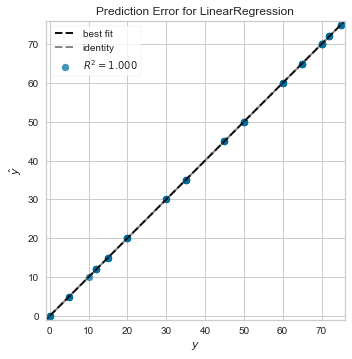

In [63]:
plot_model(model_selected, plot ='error')

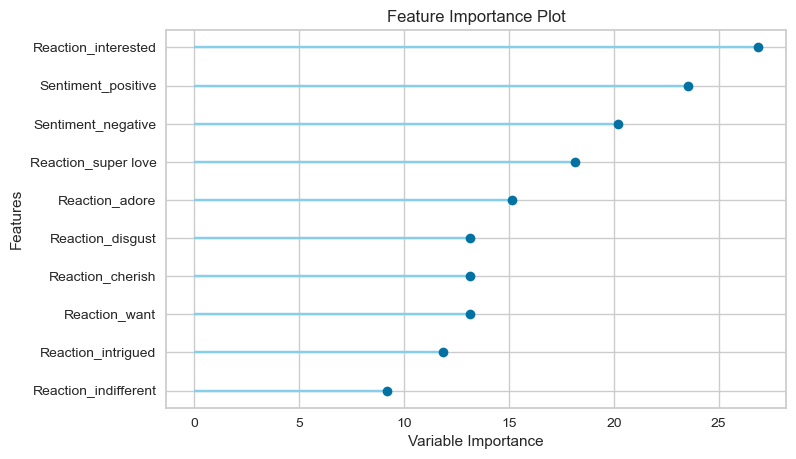

In [64]:
plot_model(model_selected, plot='feature')

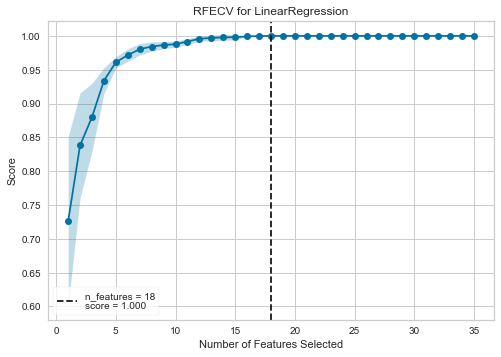

In [65]:
plot_model(model_selected, plot='rfe')

# Using Regression or Classification Models

## Using XGBoost (Scikit-Learn)

### Using RandomSearchCV

In [66]:
model = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [67]:
parameters = {'max_depth': np.arange(3,10,1),
              'eta': np.arange(0.05,0.3,0.05),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,10,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1),
              'reg_alpha':np.arange(0,1,0.1),
              'reg_lambda':np.arange(0,1,0.1)
             }

In [68]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='neg_root_mean_squared_error')

In [69]:
randm.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'min_child_weight': array([1, 2, 3]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
  

In [70]:
randm.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7999999999999999, eta=0.25,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0, reg_lambda=0.7000000000000001, scale_pos_weight=1,
             subsample=0.7999999999999999, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [71]:
randm.best_score_

-0.0980758326974476

In [72]:
randm.best_params_

{'subsample': 0.7999999999999999,
 'reg_lambda': 0.7000000000000001,
 'reg_alpha': 0.0,
 'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 5,
 'gamma': 0,
 'eta': 0.25,
 'colsample_bytree': 0.7999999999999999}

### Final Model

In [73]:
xgbmodel = XGBRegressor(random_state=0, n_estimators=100, max_depth = 5, subsample= 0.8,
                        reg_lambda = 0.7, reg_alpha=0.0, min_child_weight = 3, objective='reg:squarederror')

In [74]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:35.64323
[1]	validation_0-rmse:25.41820
[2]	validation_0-rmse:18.10688
[3]	validation_0-rmse:12.97382
[4]	validation_0-rmse:9.32075
[5]	validation_0-rmse:6.69355
[6]	validation_0-rmse:4.92185
[7]	validation_0-rmse:3.62216
[8]	validation_0-rmse:2.66355
[9]	validation_0-rmse:1.99145
[10]	validation_0-rmse:1.48790
[11]	validation_0-rmse:1.15557
[12]	validation_0-rmse:0.96156
[13]	validation_0-rmse:0.80075
[14]	validation_0-rmse:0.71212
[15]	validation_0-rmse:0.63277
[16]	validation_0-rmse:0.59931
[17]	validation_0-rmse:0.56470
[18]	validation_0-rmse:0.53208
[19]	validation_0-rmse:0.50592
[20]	validation_0-rmse:0.48616
[21]	validation_0-rmse:0.46773
[22]	validation_0-rmse:0.45177
[23]	validation_0-rmse:0.43696
[24]	validation_0-rmse:0.42348
[25]	validation_0-rmse:0.41286
[26]	validation_0-rmse:0.40074
[27]	validation_0-rmse:0.38754
[28]	validation_0-rmse:0.37445
[29]	validation_0-rmse:0.36055
[30]	validation_0-rmse:0.35254
[31]	validation_0-rmse:0.33929
[32]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.0,
             reg_lambda=0.7, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_pred = xgbmodel.predict(X_test)

In [76]:
y_pred

array([50.02001   , 65.01723   , 60.011677  , 50.02001   ,  0.00163848,
       50.02001   ,  0.00163848, 71.87926   , 60.011677  , 11.998514  ,
       34.998913  , 11.998514  , 34.998913  , 60.011677  , 30.011517  ,
       11.998514  , 65.01723   , 70.01103   , 75.01614   , 19.999947  ,
       50.02001   , 45.009464  , 70.01859   , 30.011517  , 70.01859   ,
       14.998891  , 19.999947  , 70.01859   ,  5.001393  , 14.998891  ,
       70.01859   , 11.998514  ,  5.001393  , 65.01723   , 11.998514  ,
       71.87926   , 11.998514  , 70.01859   , 45.009464  , 71.87926   ,
       45.009464  , 50.02001   , 45.009464  , 30.011517  , 70.01103   ,
       71.87926   , 75.01614   , 19.999947  , 70.01103   ,  5.001393  ,
       75.01614   , 71.87926   ], dtype=float32)

### Model Evaluation

In [77]:
mse = mean_squared_error(y_test,y_pred)
mse

0.001535707183182335

In [78]:
rmse = np.sqrt(mse)
rmse

0.03918810002006139

In [79]:
r2score = r2_score(y_test,y_pred)
r2score

0.9999975964839806

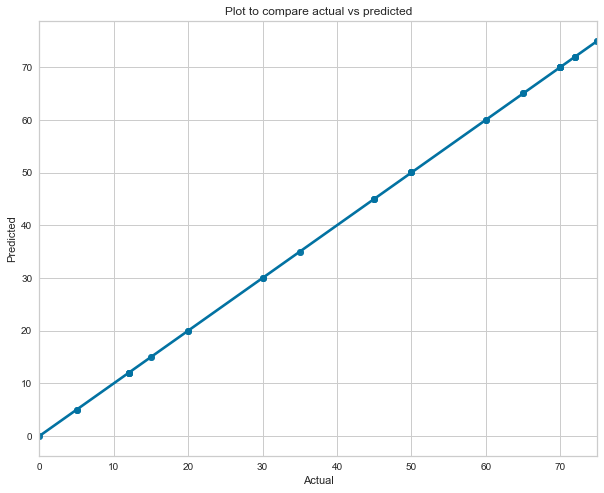

In [80]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Cross-Validation

In [81]:
cv = cross_val_score(model,X,y,cv=5,verbose=1,scoring='neg_root_mean_squared_error')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [82]:
cv.mean()

-0.026830200411614536

#### Python code done by Dennis Lam